In [42]:
from OPUS.utils.PlotHandler import PlotData
from OPUS.utils.MocatParameters import configure_mocat
from OPUS.utils.MultiSpecies import MultiSpecies
import matplotlib.pyplot as plt
import os
import json

scenario_files=[
                    "Baseline",
                    "bond_0k_25yr",
                    "bond_100k",
                    # "bond_200k",
                    # # "bond_300k",
                    # # # "bond_500k",
                    "bond_800k",
                    "bond_1200k",
                    "bond_1600k",
                    # # "bond_100k_25yr",
                    # # # "bond_200k_25yr",
                    # "bond_300k_25yr",
                    # # # "bond_500k_25yr",
                    "bond_800k_25yr",
                    "bond_1200k_25yr",
                    "bond_1600k_25yr",
                    # "tax_1",
                    # "tax_2"
                ]
    
MOCAT_config = json.load(open("./OPUS/configuration/multi_single_species.json"))

simulation_name = "Test"

multi_species_names = ["S", "Su", "Sns"]

# This will create a list of OPUSSpecies objects. 
multi_species = MultiSpecies(multi_species_names)


In [44]:
MOCAT,_ = configure_mocat(MOCAT_config, multi_species=multi_species)

Splitting species N into 2 species with masses [0.00141372, 0.567].
Added 3 active species, 5 debris species, and 1 rocket body species to the simulation.
Pairing the following active species to debris classes for PMD modeling...
['S', 'Su', 'Sns']
Matched species S to debris species N_500kg.
Matched species Su to debris species N_223kg.
Matched species Sns to debris species N_6kg.
    Name: N_0.00141372kg
    pmd_linked_species: []
    Name: N_0.567kg
    pmd_linked_species: []
    Name: N_6kg
    pmd_linked_species: ['Sns']
    Name: N_223kg
    pmd_linked_species: ['Su']
    Name: N_500kg
    pmd_linked_species: ['S']


Creating collision pairs: 100%|██████████| 45/45 [00:11<00:00,  4.06it/s]


Using launch file: pyssem/utils/launch/data/ref_scen_SEP1.csv

Species class distribution:
species_class
N      54704
S       6319
Sns     3356
Su      3123
B       2082
Name: count, dtype: int64
No unknown species classes found.

Species class distribution:
species_class
N      54704
S       6319
Sns     3356
Su      3123
B       2082
Name: count, dtype: int64
No unknown species classes found.
Number of objects for each species in T_new: species
N_0.00141372kg    52575
S                  6319
Sns                3356
Su                 3123
B                  2082
N_0.567kg          1858
N_500kg             130
N_6kg               121
N_223kg              20
Name: count, dtype: int64


/opt/anaconda3/envs/pyssem-env/lib/python3.10/site-packages/pyssem/utils/launch/launch.py:407: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x0_summary = pd.DataFrame(index=range(scen_properties.n_shells), columns=scen_properties.species_names).fillna(0)
Processing Time Steps: 100%|██████████| 10/10 [00:00<00:00, 731.42it/s]


You have these species in the model:  ['S', 'Su', 'Sns', 'N_0.00141372kg', 'N_0.567kg', 'N_6kg', 'N_223kg', 'N_500kg', 'B']
Using the default economic parameters for the species:  N
Key 'OPUS' not found in the dictionary for species 'N 
 Please include if you want to use the economic parameters in the model.
Using the default economic parameters for the species:  B
Key 'OPUS' not found in the dictionary for species 'B 
 Please include if you want to use the economic parameters in the model.


Generating plots for scenario:  Baseline
Generating plots for scenario:  bond_0k_25yr
Generating plots for scenario:  bond_100k
Generating plots for scenario:  bond_800k
Generating plots for scenario:  bond_1200k
Generating plots for scenario:  bond_1600k
Generating plots for scenario:  bond_800k_25yr
Generating plots for scenario:  bond_1200k_25yr
Generating plots for scenario:  bond_1600k_25yr
Creating plot: comparison_object_counts_vs_bond
Split object count plot saved to Results/Test/comparisons/object_counts_vs_bond_split.png
Creating plot: comparison_scatter_noncompliance_vs_bond
[5.132187225283639, 45.99531453149731, 148.35730785739537, 5.115901834046675, 26.409956576275366, 80.98643567987645, 7.485832533377119, 81.44427739110745, 117.03624172771529, 5.779149794992048, 69.66402760919586, 95.44253474013384, 5.232127043137613, 79.40571224079308, 124.96340912343099, 12.203447181042922, 114.69268156608855, 278.6704976040868, 9.045664638164512, 53.21743816303628, 104.37565547428068, 

/var/folders/s7/wvhpsthj2y93nhzxmj7x1zw80000gn/T/ipykernel_29975/11763961.py:361: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=species_to_color[sp], label=sp, s=50, edgecolors='k', linewidths=0.5)


Scatter plot saved to Results/Test/comparisons/scatter_noncompliance_vs_bond.png
Creating plot: comparison_total_welfare_vs_time


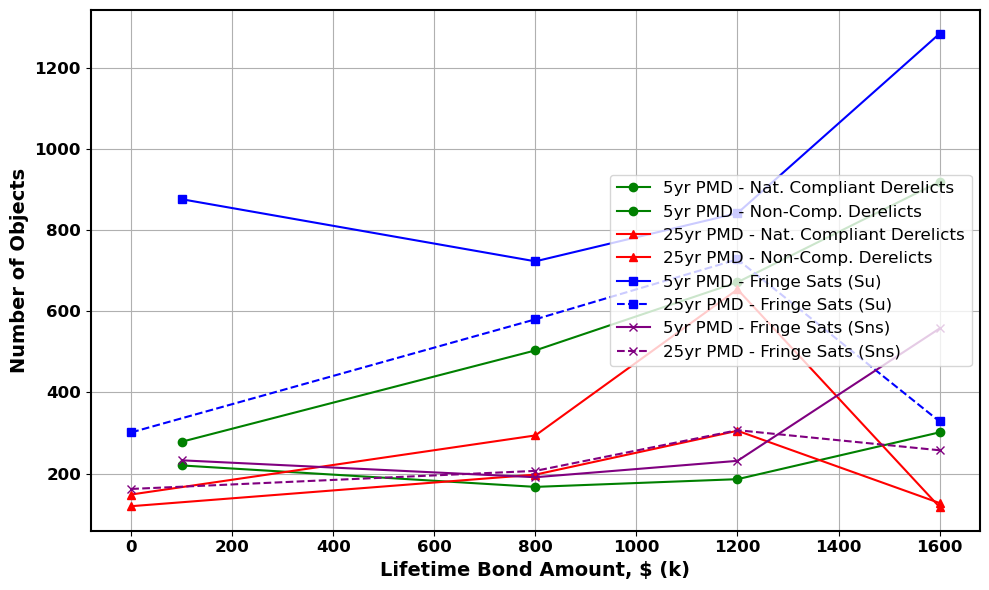

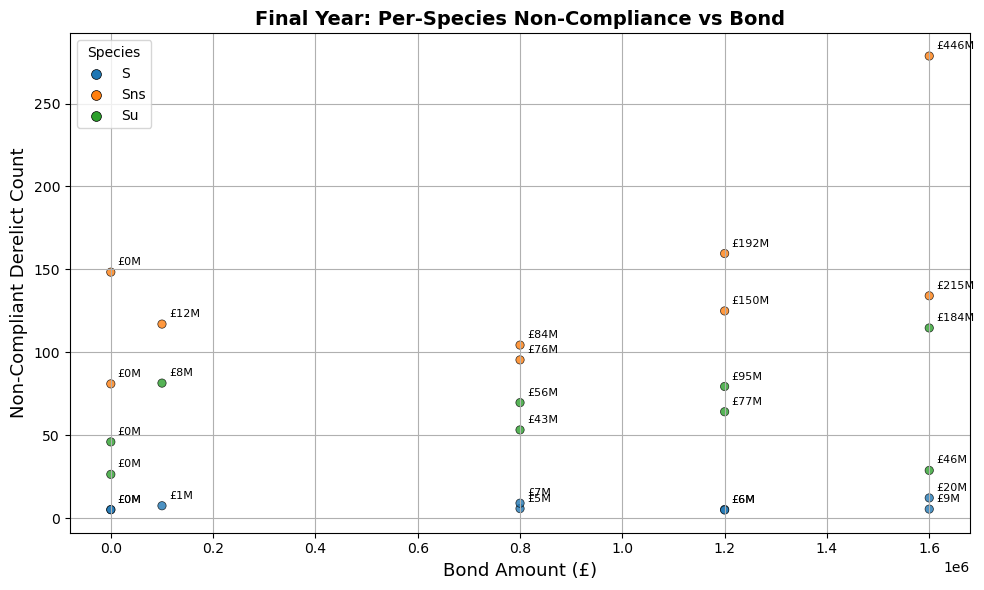

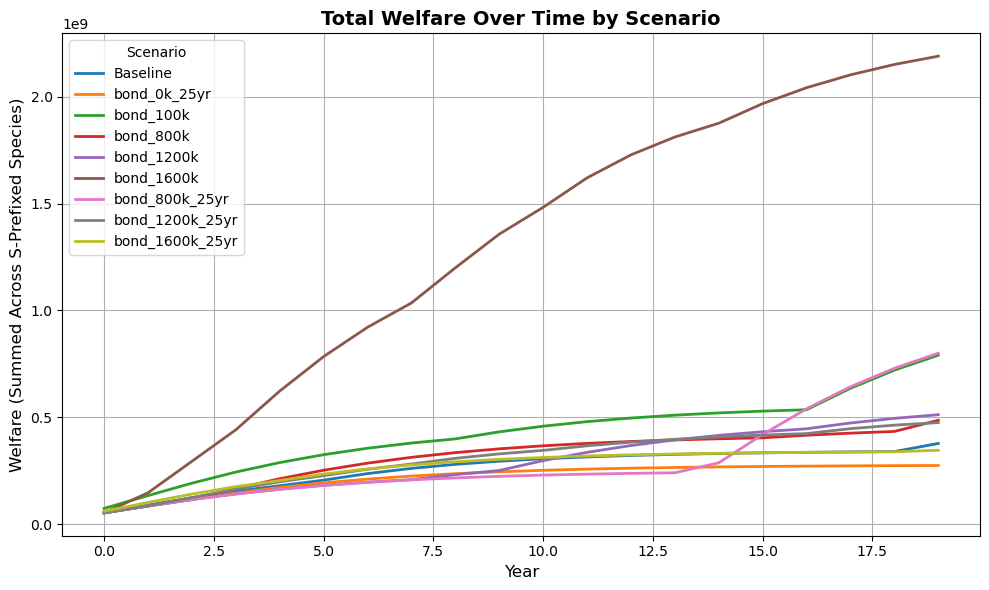

Scenario-wise total welfare plot saved to Results/Test/comparisons/total_welfare_across_scenarios.png


In [52]:
import matplotlib.cm as cm
import numpy as np

class PlotHandler:  
        def __init__(self, MOCAT, scenario_files, simulation_name, plot_types=["all_plots"], comparison=True):
                """
                Initialize the PlotHandler.
                Comparison will compare all of the simulation names
                """
                
                self.MOCAT = MOCAT
                self.scenario_files = scenario_files # This will be a list of each sub-scenario run name
                self.simulation_name = simulation_name # This is the overall name of the simualtion 
                self.plot_types = plot_types # This will be a list of the types of plots to be generated
                self.HMid = self.MOCAT.scenario_properties.HMid
                self.n_shells = self.MOCAT.scenario_properties.n_shells

                # This will rely on the fact that there is a file available under the simulation name in the Results folder. 
                self.simulation_folder = os.path.join("Results", self.simulation_name)
                
                # if not show error to the user
                if not os.path.exists(self.simulation_folder):
                        print(f"Error: {self.simulation_folder} does not exist.")
                        return
                
                plot_data_list = []
                other_data_list = []
                econ_params_list = []

                # Loop through the scenario files and generate the plots
                for scenario in self.scenario_files:
                        scenario_folder = os.path.join(self.simulation_folder, scenario)
                        if not os.path.exists(scenario_folder):
                                print(f"Error: {scenario_folder} folder does not exist. Skipping scenario...")
                                continue
                        else: 
                                print("Generating plots for scenario: ", scenario)

                                # Build a PlotData object and then pass to the plotting functions
                                plot_data = PlotData(scenario, scenario_folder, MOCAT)
                                other_data = plot_data.get_other_data()
                                econ_data = plot_data.econ_params

                                # Add to lists for comparison plots
                                plot_data_list.append(plot_data)
                                other_data_list.append(other_data)
                                econ_params_list.append(econ_data)

                                # If the plot_types is None, then generate all plots
                                if "all_plots" in self.plot_types:
                                        self.all_plots(plot_data, other_data, econ_data)
                                else:
                                        # Dynamically generate plots
                                        for plot_name in self.plots:
                                                plot_method = getattr(self, plot_name, None)
                                                if callable(plot_method):
                                                        print(f"Creating plot: {plot_name}")
                                                        plot_method()
                                                else:
                                                        print(f"Warning: Plot '{plot_name}' not found. Skipping...")

                if comparison:
                        self._comparison_plots(plot_data_list, other_data_list)
                
        def _comparison_plots(self, plot_data_lists, other_data_lists):
                """
                Run all plot functions that start with 'comparison_', ignoring others.
                """
                for attr_name in dir(self):
                        # Grab the attribute; see if it’s a callable (method)
                        attr = getattr(self, attr_name)
                        if callable(attr):
                        # Skip known special methods
                                if attr_name in ("__init__", "all_plots"):
                                        continue

                        # Only call if it starts with 'comparison_'
                        if attr_name.startswith("comparison_"):
                                print(f"Creating plot: {attr_name}")
                                plot_method = attr
                                plot_method(plot_data_lists, other_data_lists)

        def all_plots(self, plot_data, other_data, econ_params):
                """
                Run all plot functions, irrespective of the plots list.
                """
                for attr_name in dir(self):
                        if callable(getattr(self, attr_name)) and attr_name not in ("__init__", "all_plots"):
                                if not attr_name.startswith("_") and not attr_name.startswith("comparison_") and not attr_name.startswith("econ_"):
                                        print(f"Creating plot: {attr_name}")
                                        plot_method = getattr(self, attr_name)
                                        plot_method(plot_data, other_data)
                                elif attr_name.startswith("econ_"):
                                        print(f"Creating plot: {attr_name}")
                                        plot_method = getattr(self, attr_name)
                                        plot_method(plot_data.path, econ_params)

        # def comparison_surface_plots(self, plot_data_lists, other_data_lists):
        #         """
        #         Generate 3D surface plots of scenario metrics over time and altitude.
        #         Metrics: ror, collision_probability, launch_rate, collision_probability_all_species.
        #         """
        #         import matplotlib.pyplot as plt
        #         from mpl_toolkits.mplot3d import Axes3D
        #         import numpy as np
        #         import os

        #         variables = [
        #                 "ror",
        #                 "collision_probability",
        #                 "launch_rate",
        #                 "collision_probability_all_species"
        #         ]

        #         output_folder = os.path.join(self.simulation_folder, "comparisons", "surface_plots")
        #         os.makedirs(output_folder, exist_ok=True)

        #         for plot_data, other_data in zip(plot_data_lists, other_data_lists):
        #                 scenario_name = getattr(plot_data, 'scenario', 'UnnamedScenario')
        #                 scenario_path = os.path.join(output_folder, scenario_name)
        #                 os.makedirs(scenario_path, exist_ok=True)

        #                 timesteps = sorted(other_data.keys(), key=int)
        #                 HMid = self.MOCAT.scenario_properties.HMid  # Altitude per shell

        #                 for var in variables:
        #                 # Skip if key missing or not list-like
        #                         if var not in other_data[timesteps[0]]:
        #                                 continue

        #                         try:
        #                                 # Assume 1D list per timestep; expand across HMid for surface
        #                                 Z = []
        #                                 for t in timesteps:
        #                                         val = other_data[t][var]
        #                                         Z.append(np.ones(len(HMid)) * val)
        #                                 Z = np.array(Z)
        #                                 T, A = np.meshgrid(np.arange(len(timesteps)), HMid, indexing='ij')

        #                                 # Plot surface
        #                                 fig = plt.figure(figsize=(8, 6))
        #                                 ax = fig.add_subplot(111, projection='3d')
        #                                 surf = ax.plot_surface(A, T, Z, cmap='viridis')
        #                                 ax.set_title(f"{scenario_name} - {var}")
        #                                 ax.set_xlabel("Altitude (km)")
        #                                 ax.set_ylabel("Timestep")
        #                                 ax.set_zlabel(var)

        #                                 fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
        #                                 plt.tight_layout()

        #                                 #save_path = os.path.join(scenario_path, f"{var}_surface.png")
        #                                 plt.show()
        #                                 #print(f"Saved surface plot: {save_path}")
        #                         except Exception as e:
        #                                 print(f"Skipping {var} for {scenario_name} due to error: {e}")
        def comparison_object_counts_vs_bond(self, plot_data_lists, other_data_lists):
                """
                Compare number of derelicts (N_223kg) and fringe satellites (Su and Sns) across 5yr and 25yr PMD scenarios.
                Separates naturally compliant vs non-compliant derelicts using econ_params.

                X-axis: Bond amount ($k)
                Y-axis: Number of objects
                """
                import os
                import json
                import re
                import numpy as np
                import matplotlib.pyplot as plt

                root_folder = self.simulation_folder

                # Separate derelicts by compliance category
                bond_5yr_nat, nat_5yr = [], []
                bond_5yr_non, non_5yr = [], []
                bond_25yr_nat, nat_25yr = [], []
                bond_25yr_non, non_25yr = [], []

                # Fringe satellite counts
                bond_5yr_Su, Su_5yr = [], []
                bond_25yr_Su, Su_25yr = [], []

                bond_5yr_Sns, Sns_5yr = [], []
                bond_25yr_Sns, Sns_25yr = [], []

                for folder_name in os.listdir(root_folder):
                        folder_path = os.path.join(root_folder, folder_name)
                        if not os.path.isdir(folder_path):
                                continue

                        is_25yr = folder_name.endswith("25yr")
                        match = re.findall(r"\d+", folder_name)
                        bond = float(match[0]) if match else None
                        if bond is None:
                                continue

                        species_file = next((f for f in os.listdir(folder_path) if f.startswith("species_data")), None)
                        econ_file = next((f for f in os.listdir(folder_path) if f.startswith("econ_params") and f.endswith(".json")), None)
                        if not econ_file:
                                continue

                        with open(os.path.join(folder_path, econ_file), "r") as f:
                                econ = json.load(f)
                        if not species_file:
                                continue

                        with open(os.path.join(folder_path, species_file), "r") as f:
                                data = json.load(f)

                        try:
                                N_arr = np.array(data["N_223kg"])  # (timesteps, shells)
                                Su_arr = np.array(data["Su"])      # (timesteps, shells)
                                Sns_arr = np.array(data.get("Sns", []))  # Optional

                                final_N = N_arr[-1]
                                final_Su = np.sum(Su_arr[-1])
                                final_Sns = np.sum(Sns_arr[-1]) if len(Sns_arr) > 0 else 0
                        except (KeyError, IndexError, TypeError):
                                continue

                        nat_vec = np.array(econ.get("naturally_compliant_vector", []))
                        if len(nat_vec) != len(final_N):
                                continue  # mismatch in dimensions

                        nat_sum = np.sum(final_N[nat_vec == 1])
                        non_sum = np.sum(final_N[nat_vec == 0])

                        if is_25yr:
                                bond_25yr_nat.append(bond)
                                nat_25yr.append(nat_sum)
                                bond_25yr_non.append(bond)
                                non_25yr.append(non_sum)
                                bond_25yr_Su.append(bond)
                                Su_25yr.append(final_Su)
                                bond_25yr_Sns.append(bond)
                                Sns_25yr.append(final_Sns)
                        else:
                                bond_5yr_nat.append(bond)
                                nat_5yr.append(nat_sum)
                                bond_5yr_non.append(bond)
                                non_5yr.append(non_sum)
                                bond_5yr_Su.append(bond)
                                Su_5yr.append(final_Su)
                                bond_5yr_Sns.append(bond)
                                Sns_5yr.append(final_Sns)

                # --- Sort helper ---
                def sort_by_bond(bonds, vals):
                        zipped = sorted(zip(bonds, vals), key=lambda x: x[0])
                        return zip(*zipped) if zipped else ([], [])

                bond_5yr_nat, nat_5yr = sort_by_bond(bond_5yr_nat, nat_5yr)
                bond_5yr_non, non_5yr = sort_by_bond(bond_5yr_non, non_5yr)
                bond_25yr_nat, nat_25yr = sort_by_bond(bond_25yr_nat, nat_25yr)
                bond_25yr_non, non_25yr = sort_by_bond(bond_25yr_non, non_25yr)
                bond_5yr_Su, Su_5yr = sort_by_bond(bond_5yr_Su, Su_5yr)
                bond_25yr_Su, Su_25yr = sort_by_bond(bond_25yr_Su, Su_25yr)
                bond_5yr_Sns, Sns_5yr = sort_by_bond(bond_5yr_Sns, Sns_5yr)
                bond_25yr_Sns, Sns_25yr = sort_by_bond(bond_25yr_Sns, Sns_25yr)

                # --- Plot ---
                plt.figure(figsize=(10, 6))

                # Derelicts
                plt.plot(bond_5yr_nat, nat_5yr, marker='o', linestyle='-', color='green', label='5yr PMD - Nat. Compliant Derelicts')
                plt.plot(bond_5yr_non, non_5yr, marker='o', linestyle='-', color='green', label='5yr PMD - Non-Comp. Derelicts')
                plt.plot(bond_25yr_nat, nat_25yr, marker='^', linestyle='-', color='red', label='25yr PMD - Nat. Compliant Derelicts')
                plt.plot(bond_25yr_non, non_25yr, marker='^', linestyle='-', color='red', label='25yr PMD - Non-Comp. Derelicts')

                # Fringe satellites - Su
                plt.plot(bond_5yr_Su, Su_5yr, marker='s', linestyle='-', color='blue', label='5yr PMD - Fringe Sats (Su)')
                plt.plot(bond_25yr_Su, Su_25yr, marker='s', linestyle='--', color='blue', label='25yr PMD - Fringe Sats (Su)')

                # Fringe satellites - Sns
                plt.plot(bond_5yr_Sns, Sns_5yr, marker='x', linestyle='-', color='purple', label='5yr PMD - Fringe Sats (Sns)')
                plt.plot(bond_25yr_Sns, Sns_25yr, marker='x', linestyle='--', color='purple', label='25yr PMD - Fringe Sats (Sns)')

                plt.xlabel("Lifetime Bond Amount, $ (k)", fontsize=14, fontweight='bold')
                plt.ylabel("Number of Objects", fontsize=14, fontweight='bold')
                plt.xticks(fontsize=12, fontweight='bold')
                plt.yticks(fontsize=12, fontweight='bold')
                plt.grid(True)
                plt.legend(fontsize=12, loc='center right')
                plt.tight_layout()

                for spine in plt.gca().spines.values():
                        spine.set_linewidth(1.5)

                # Save and show
                file_path = os.path.join(self.simulation_folder, "comparisons", "object_counts_vs_bond_split.png")
                os.makedirs(os.path.dirname(file_path), exist_ok=True)
                plt.savefig(file_path, dpi=300)
                print(f"Split object count plot saved to {file_path}")

        def comparison_scatter_noncompliance_vs_bond(self, plot_data_lists, other_data_lists):
                """
                Create a scatter plot showing per-species non-compliance vs bond amount:
                - X-axis: bond amount (£)
                - Y-axis: non-compliance (object count per species)
                - Color: species name
                - Size: total money paid (non_compliance × bond)
                Labels show total money in millions with a £ sign.
                """
                import matplotlib.pyplot as plt
                import numpy as np
                import os
                import re
                import itertools

                scatter_folder = os.path.join(self.simulation_folder, "comparisons")
                os.makedirs(scatter_folder, exist_ok=True)
                file_path = os.path.join(scatter_folder, "scatter_noncompliance_vs_bond.png")

                bond_vals = []
                noncompliance_vals = []
                total_money_vals = []
                species_labels = []

                for i, (plot_data, other_data) in enumerate(zip(plot_data_lists, other_data_lists)):
                        scenario_label = getattr(plot_data, 'scenario', f"Scenario {i+1}")
                        timesteps = sorted(other_data.keys(), key=int)
                        final_timestep = timesteps[-1]
                        nc_dict = other_data[final_timestep].get("non_compliance", {})

                        # Extract bond amount from name (e.g., "bond_800k" → 800000)
                        match = re.search(r"bond_(\d+)k", scenario_label.lower())
                        bond = int(match.group(1)) * 1_000 if match else 0

                        for species_name, nc_value in nc_dict.items():
                                bond_vals.append(bond)
                                noncompliance_vals.append(nc_value)
                                total_money_vals.append(bond * nc_value)
                                species_labels.append(species_name)

                # Unique species for coloring
                unique_species = sorted(set(species_labels))
                species_to_color = {sp: color for sp, color in zip(unique_species, plt.cm.tab10.colors)}

                # Assign colors to each point
                point_colors = [species_to_color[sp] for sp in species_labels]

                # Create scatter plot
                plt.figure(figsize=(10, 6))
                scatter = plt.scatter(
                        bond_vals, noncompliance_vals, 
                        c=point_colors, 
                        #s=[max(20, val / 10_000) for val in total_money_vals],  # size scaled by money
                        alpha=0.8,
                        edgecolors='k',
                        linewidths=0.5
                )

                print(noncompliance_vals)
                # Annotate with £ labels
                for x, y, total, sp in zip(bond_vals, noncompliance_vals, total_money_vals, species_labels):
                        label = f"£{round(total / 1_000_000)}M"
                        plt.annotate(label, (x, y), textcoords="offset points", xytext=(5, 5), fontsize=8)

                # Add legend manually using unique species
                for sp in unique_species:
                        plt.scatter([], [], c=species_to_color[sp], label=sp, s=50, edgecolors='k', linewidths=0.5)

                plt.xlabel("Bond Amount (£)", fontsize=13)
                plt.ylabel("Non-Compliant Derelict Count", fontsize=13)
                plt.title("Final Year: Per-Species Non-Compliance vs Bond", fontsize=14, fontweight='bold')
                plt.legend(title="Species", fontsize=10)
                plt.grid(True)
                plt.tight_layout()

                plt.savefig(file_path, dpi=300)
                print(f"Scatter plot saved to {file_path}")

        def comparison_total_welfare_vs_time(self, plot_data_lists, other_data_lists):
                """
                Plot total welfare over time for each scenario.
                - Each line corresponds to one scenario.
                - Welfare is summed across all S-prefixed species per timestep.
                - Welfare = 100 × (sum of satellites)^2 at each timestep.
                """
                import numpy as np
                import matplotlib.pyplot as plt
                import os

                coef = 1e2
                plt.figure(figsize=(10, 6))

                for plot_data in plot_data_lists:
                        species_data = {sp: np.array(data) for sp, data in plot_data.data.items()}
                        s_species_names = [sp for sp in species_data if sp.startswith("S")]

                        if not s_species_names:
                                print(f"No S-prefixed species found in scenario '{plot_data.scenario}'")
                                continue

                        # Sum all S-prefixed species into one welfare curve
                        total_sats = None
                        for sp in s_species_names:
                                arr = species_data[sp]  # (timesteps, shells)
                                sats = np.sum(arr, axis=1)  # (timesteps,)
                                total_sats = sats if total_sats is None else total_sats + sats

                        welfare = coef * (total_sats ** 2)
                        label = getattr(plot_data, 'scenario', 'Unnamed Scenario')
                        plt.plot(welfare, label=label, linewidth=2)

                plt.title("Total Welfare Over Time by Scenario", fontsize=14, fontweight='bold')
                plt.xlabel("Year", fontsize=12)
                plt.ylabel("Welfare (Summed Across S-Prefixed Species)", fontsize=12)
                plt.legend(title="Scenario", fontsize=10)
                plt.grid(True)
                plt.tight_layout()

                # Save
                outdir = os.path.join(self.simulation_folder, "comparisons")
                os.makedirs(outdir, exist_ok=True)
                file_path = os.path.join(outdir, "total_welfare_across_scenarios.png")
                plt.savefig(file_path, dpi=300)
                plt.show()

                print(f"Scenario-wise total welfare plot saved to {file_path}")


PlotHandler(MOCAT, scenario_files, simulation_name, plot_types=["all_plots"], comparison=True)

: 

: 

In [ ]:
bond_vals

NameError: name 'bond_vals' is not defined

: 

: 

: 

: 